<a href="https://colab.research.google.com/github/IrinaFab/Bank-MK/blob/main/BankMkting_ROC_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import libraries
## Basic libraries
import pandas as pd
import numpy as np
from operator import itemgetter 
import warnings
from pandas._libs import index

## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn import tree
from sklearn.tree import _tree
from sklearn.ensemble import RandomForestClassifier    
from sklearn.ensemble import GradientBoostingClassifier  
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import scipy.stats as stats
from IPython.display import Image

from imblearn.over_sampling import SMOTE

# Configure libraries
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
data = pd.read_csv('/content/drive/MyDrive/outpur.csv')

In [7]:
data.shape

(41170, 38)

In [ ]:
data.head().T

In [ ]:
data = data.drop(['Unnamed: 0'], axis=1)
data.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'z_marital_divorced', 'z_marital_married', 'z_marital_single',
       'z_default_no', 'z_default_yes', 'z_housing_no', 'z_housing_yes',
       'z_loan_no', 'z_loan_yes', 'z_contact_cellular', 'z_contact_telephone',
       'z_day_of_week_fri', 'z_day_of_week_mon', 'z_day_of_week_thu',
       'z_day_of_week_tue', 'z_day_of_week_wed', 'z_poutcome_failure',
       'z_poutcome_success', 'z_edu_new_high', 'z_edu_new_post_high',
       'z_edu_new_pre_high', 'z_job_new_blue_collar', 'z_job_new_not_working',
       'z_job_new_white_collar', 'z_season_fall', 'z_season_spring',
       'z_season_summer'],
      dtype='object')

In [9]:
data.shape

(41170, 38)

In [10]:
#replacing no and yes by 0 and 1 for 'y' (deposit)
data['y'] = data['y'].replace(['no','yes'],[0,1])
data['y'].unique()

array([0, 1])

In [11]:
TARGET = 'y'

In [ ]:
# creating a copy of the data set
x = data.copy()
x.head().T

In [ ]:
# Preparing the data to be used to build the decision tree, dropping TARGET 
x = x.drop( TARGET, axis = 1 )
x.head().T

In [14]:
x.shape

(41170, 37)

In [15]:
varNames = x.columns

# Scaler 
Due to the different qualities of the indicators, standardized processing generally plays a crucial role in transforming raw data into dimensionless index, that is, each index value is at the same scale level. 

In [16]:
ss = StandardScaler()
x = ss.fit_transform(x)

In [17]:
x = pd.DataFrame(x)

In [ ]:
x.head().T

In [19]:
varNames_std = []
for i in varNames:
  newName = "std_" + i
  varNames_std.append(newName)

x.columns = varNames_std
x.head()

,std_Unnamed: 0,std_age,std_campaign,std_pdays,std_previous,std_emp.var.rate,std_cons.price.idx,std_cons.conf.idx,std_euribor3m,std_nr.employed,...,std_z_poutcome_success,std_z_edu_new_high,std_z_edu_new_post_high,std_z_edu_new_pre_high,std_z_job_new_blue_collar,std_z_job_new_not_working,std_z_job_new_white_collar,std_z_season_fall,std_z_season_spring,std_z_season_summer
0,-1.731819,1.533626,-0.565884,0.195391,-0.349505,0.648055,0.72258,0.886542,0.712435,0.331689,...,-0.185672,-0.548256,-0.856047,1.513333,0.979230,-0.309832,-0.806165,-0.387962,1.195849,-0.910475
1,-1.731735,1.629600,-0.565884,0.195391,-0.349505,0.648055,0.72258,0.886542,0.712435,0.331689,...,-0.185672,1.823966,-0.856047,-0.660793,0.979230,-0.309832,-0.806165,-0.387962,1.195849,-0.910475
2,-1.731651,-0.289875,-0.565884,0.195391,-0.349505,0.648055,0.72258,0.886542,0.712435,0.331689,...,-0.185672,1.823966,-0.856047,-0.660793,0.979230,-0.309832,-0.806165,-0.387962,1.195849,-0.910475
3,-1.731567,-0.001954,-0.565884,0.195391,-0.349505,0.648055,0.72258,0.886542,0.712435,0.331689,...,-0.185672,-0.548256,-0.856047,1.513333,-1.021211,-0.309832,1.240441,-0.387962,1.195849,-0.910475
4,-1.731483,1.533626,-0.565884,0.195391,-0.349505,0.648055,0.72258,0.886542,0.712435,0.331689,...,-0.185672,1.823966,-0.856047,-0.660793,0.979230,-0.309832,-0.806165,-0.387962,1.195849,-0.910475


In [20]:
x.shape

(41170, 37)

In [21]:
# storing the target into a dataframe
y = data[[TARGET]] 
y.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
y,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
# Splitting dataset 
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 1)

In [23]:
print('FLAG DATA:', '\n')
print('Shape of original INPUT data set:', x.shape)
print('Shape of original OUTPUT data set:', y.shape, '\n')
print('Shape of input TRAINING data set:', x_train.shape)
print('Shape of output TRAINING data set:', y_train.shape, '\n')
print('Shape of input TEST data set:', x_test.shape)
print('Shape of output TEST data set:', y_test.shape)

FLAG DATA: 

Shape of original INPUT data set: (41170, 37)
Shape of original OUTPUT data set: (41170, 1) 

Shape of input TRAINING data set: (32936, 37)
Shape of output TRAINING data set: (32936, 1) 

Shape of input TEST data set: (8234, 37)
Shape of output TEST data set: (8234, 1)


# Balancing target with SMOTE

In [24]:
smote = SMOTE()
x_train, y_train = smote.fit_resample(x_train, y_train)

In [25]:
print('Shape of input TRAINING data set following SMOTE:', x_train.shape)
print('Shape of output TRAINING data set following SMOTE:', y_train.shape, '\n')
print('Shape of input TEST data set following SMOTE:', x_test.shape)
print('Shape of output TEST data set following SMOTE:', y_test.shape)

Shape of input TRAINING data set following SMOTE: (58388, 37)
Shape of output TRAINING data set following SMOTE: (58388, 1) 

Shape of input TEST data set following SMOTE: (8234, 37)
Shape of output TEST data set following SMOTE: (8234, 1)


In [26]:
y_train.value_counts()

y
0    29194
1    29194
dtype: int64

# Random Forest

In [28]:
# creating gradient boosting classifier with respect to TARGET
my_GB = GradientBoostingClassifier( random_state = 1 )
my_GB = my_GB.fit( x_train, y_train[ TARGET ] )

In [30]:
# scoring the predictions (client subscribes or not)
y_Pred_train = my_RF.predict(x_train)
y_Pred_test = my_RF.predict(x_test)

In [31]:
# calculating the accuracy based on the metrics between the real scores and the predicted ones for both taining and test data sets
print('The accuracy of the RF model based on the training data set is ',metrics.accuracy_score(y_train[TARGET], y_Pred_train))
print('The accuracy of the RF model based on the test data set is',metrics.accuracy_score(y_test[TARGET], y_Pred_test))

The accuracy of the RF model based on the training data set is  0.9999828731931218
The accuracy of the RF model based on the test data set is 0.888268156424581


In [32]:
from sklearn.datasets import make_classification

# Confusion Matrix RF

In [33]:
confusion_matrix(y_test[TARGET], y_Pred_test)
pd.crosstab(y_test[TARGET], y_Pred_test, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,6975,365,7340
1,555,339,894
All,7530,704,8234


# Classification Report RF

In [34]:
print(classification_report(y_train[TARGET], y_Pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29194
           1       1.00      1.00      1.00     29194

    accuracy                           1.00     58388
   macro avg       1.00      1.00      1.00     58388
weighted avg       1.00      1.00      1.00     58388



In [35]:
print(classification_report(y_test[TARGET], y_Pred_test))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7340
           1       0.48      0.38      0.42       894

    accuracy                           0.89      8234
   macro avg       0.70      0.66      0.68      8234
weighted avg       0.88      0.89      0.88      8234



In [36]:
probs = my_RF.predict_proba(x_train)
p1 = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve( y_train[TARGET], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs = my_RF.predict_proba(x_test)
p1 = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve( y_test[TARGET], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

In [37]:
# saving variables for final comparison 
fpr_RF = fpr_test
tpr_RF = tpr_test
auc_RF = roc_auc_test

In [47]:
feature_cols = list( x.columns.values )
vars_RF_flag = getEnsembleTreeVars(my_RF, feature_cols )

In [48]:
# printing the variables that are the most important
for i in vars_RF_flag :
   print( i )

('std_Unnamed: 0', 100)
('std_euribor3m', 72)
('std_campaign', 67)
('std_cons.conf.idx', 47)
('std_age', 46)
('std_nr.employed', 38)
('std_cons.price.idx', 32)
('std_emp.var.rate', 24)
('std_z_default_no', 21)


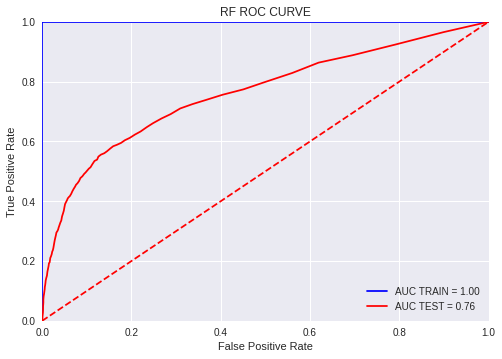

In [49]:
plt.title('RF ROC CURVE')
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC TRAIN = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC TEST = %0.2f' % roc_auc_test, color = 'red')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

ROC from scratch

In [50]:
y_Pred_train = my_RF.predict_proba(x_train)[:, 1]
y_Pred_test = my_RF.predict_proba(x_test)[:, 1]

In [43]:
def roc_from_scratch(probabilities, y_test, partitions=10):
    roc = {}
    for i in range(partitions + 1):
        
        threshold_vector = [1 if y > i/partitions else 0 for y in probabilities]
        tpr, fpr = true_false_positive(threshold_vector, y_test)
        roc[i/partitions] = [fpr, tpr]
        
    return pd.DataFrame(roc)

In [44]:
def true_false_positive(threshold_vector, y_test):
    true_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 1)
    true_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 0)
    false_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 0)
    false_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 1)

    tpr = true_positive.sum() / (true_positive.sum() + false_negative.sum())
    fpr = false_positive.sum() / (false_positive.sum() + true_negative.sum())

    return tpr, fpr

In [45]:
roc_from_scratch(y_Pred_test, y_test[TARGET], partitions=10).T 

,0,1
0.0,0.898638,0.965324
0.1,0.309264,0.710291
0.2,0.166894,0.588367
0.3,0.108174,0.513423
0.4,0.073569,0.448546
0.5,0.049728,0.379195
0.6,0.031880,0.295302
0.7,0.018120,0.210291
0.8,0.006676,0.119687
0.9,0.002044,0.050336


In [46]:
roc_auc_score(y_test[TARGET],y_Pred_test)

0.7612774232089192